# Projet numéro 5  : segmentation des clients d'un site d'e-commerce


L'objectif de ce notebook est de réaliser une analyse exploratoire des données et d'exporter les données pour qu'elles soient segmentées dans les autres notebooks.


## **Sommaire**

0. [Dataset sur la traduction des données](#traduction)

1. [Dataset sur les utilisateurs](#Introduction)

2. [Dataset sur la géolocalisation](#Renommages)

4. [Dataset sur les produits](#produits)

5. [Dataset sur les commandes](#corr) 

6. [Datset sur les objets commandés](#createurs)

7. [Dataset sur les paiements](#createur) 

8. [Dataset sur les avis des clients](#createur1)

9. [Dataset sur les vendeurs](#createur2) 

10. [Mise en commun des Datasets](#createur3) 






## **Préambule**  
### Importation des bibliothèques

 

In [ ]:
pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 1.3 MB/s 
     |████████████████████████████████| 1.4 MB 19.5 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 65 kB 3.0 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=f7d3a603bbb70666f2041c5b8642b2329c1f4dcfe0c5b42c25d0cf8b6e61401e
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


In [ ]:
import numpy as np

import pandas as pd

from datetime import datetime

from googletrans import Translator

import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns
sns.set_style("whitegrid")
sns.color_palette("crest", as_cmap = True)

import statistics
import folium
import folium.plugins
pd.set_option('display.max_rows', None)

On utilise les bibliothèques suivantes  :

- NumPy permet d’effectuer des calculs numériques avec Python et introduit une  gestion facilitée des tableaux de nombres.

- MatplotLib permet de représenter des graphiques en 2D. Elle permet de produire une grande variété de graphiques et ils sont de grande qualité.

- Seaborn permet de créer des graphiques statistiques en Python. Elle est basée sur Matplotlib, et s'intègre avec les structures Pandas

- Folium permet de faire le lien entre les datasets qui contiennent les données géographiques des différents objets à afficher qui sont manipulés avec Python et Leaflet qui permet de générer le visuel de la cartographie.

Les versions des bibliothèques sont :

In [ ]:
!python --version

Python 3.7.13


In [ ]:
print('\n'.join(f'{m.__name__} {m.__version__}' 
                for m in globals().values() if getattr(m, '__version__', None)))

numpy 1.21.6
pandas 1.3.5
seaborn 0.11.2
folium 0.12.1.post1


### Présentation d'Olist

[Olist](https://olist.com/pt-br/) est un site d'e-commerce qui vend des produits de tout types comme des produits de néttoyage ou des produits électroniques au Brésil.

Pour la suite du projet, on va créer un dictionnaire reliant les [états du Brésil](https://en.wikipedia.org/wiki/Federative_units_of_Brazil) à leurs initiales (qui sont utilisées dans les jeux de données). 

In [ ]:
mon_dictionnaire = {"AP":"Acre", 
                    "AL":"Alagoas",
                    "AP":"Amapá",
                    "AM":"Amazonas",
                    "BA":"Bahia",
                    "CE":"Ceará",
                    "ES":"Espírito Santo",
                    "GO":"Goiás",
                    "MA":"Maranhão",
                    "MT":"Mato Grosso",
                    "MS":"Mato Grosso do Sul",
                    "MG":"Minas Gerais",
                    "PA":"Pará",
                    "PB":"Paraïba",
                    "PR":"Paraná",
                    "PE":"Pernambouc",
                    "PI":"Piauí",
                    "RJ":"Rio de Janeiro",
                    "RN":"Rio Grande do Norte",
                    "RS":"Rio Grande do Sul ", 
                    "RO":"Rondônia",
                    "RR":"Roraima",
                    "SC":"Santa Catarina",
                    "SP":"São Paulo",
                    "SE":"Sergipe",
                    "TO":"Tocantins ",
                    "DF":"District fédéral"}

### Importation des données 

In [ ]:
use_colab = True 

if use_colab:
    from google.colab import drive
    drive.mount('/content/drive')
    path ='/content/drive/MyDrive/'
else:
    path ='/data/'

trad = pd.read_csv(path + 'product_category_name_translation.csv')

utilisateur = pd.read_csv(path + 'olist_customers_dataset.csv')

localisation = pd.read_csv(path + 'olist_geolocation_dataset.csv')

product = pd.read_csv(path + 'olist_products_dataset.csv')

orders = pd.read_csv(path + 'olist_orders_dataset.csv')

items = pd.read_csv(path + 'olist_order_items_dataset.csv')

payments = pd.read_csv(path + 'olist_order_payments_dataset.csv')

review = pd.read_csv(path + 'olist_order_reviews_dataset.csv')

sellers = pd.read_csv(path + 'olist_sellers_dataset.csv')

Mounted at /content/drive


Les jeux de données sont tous reliés de la manière suivante :

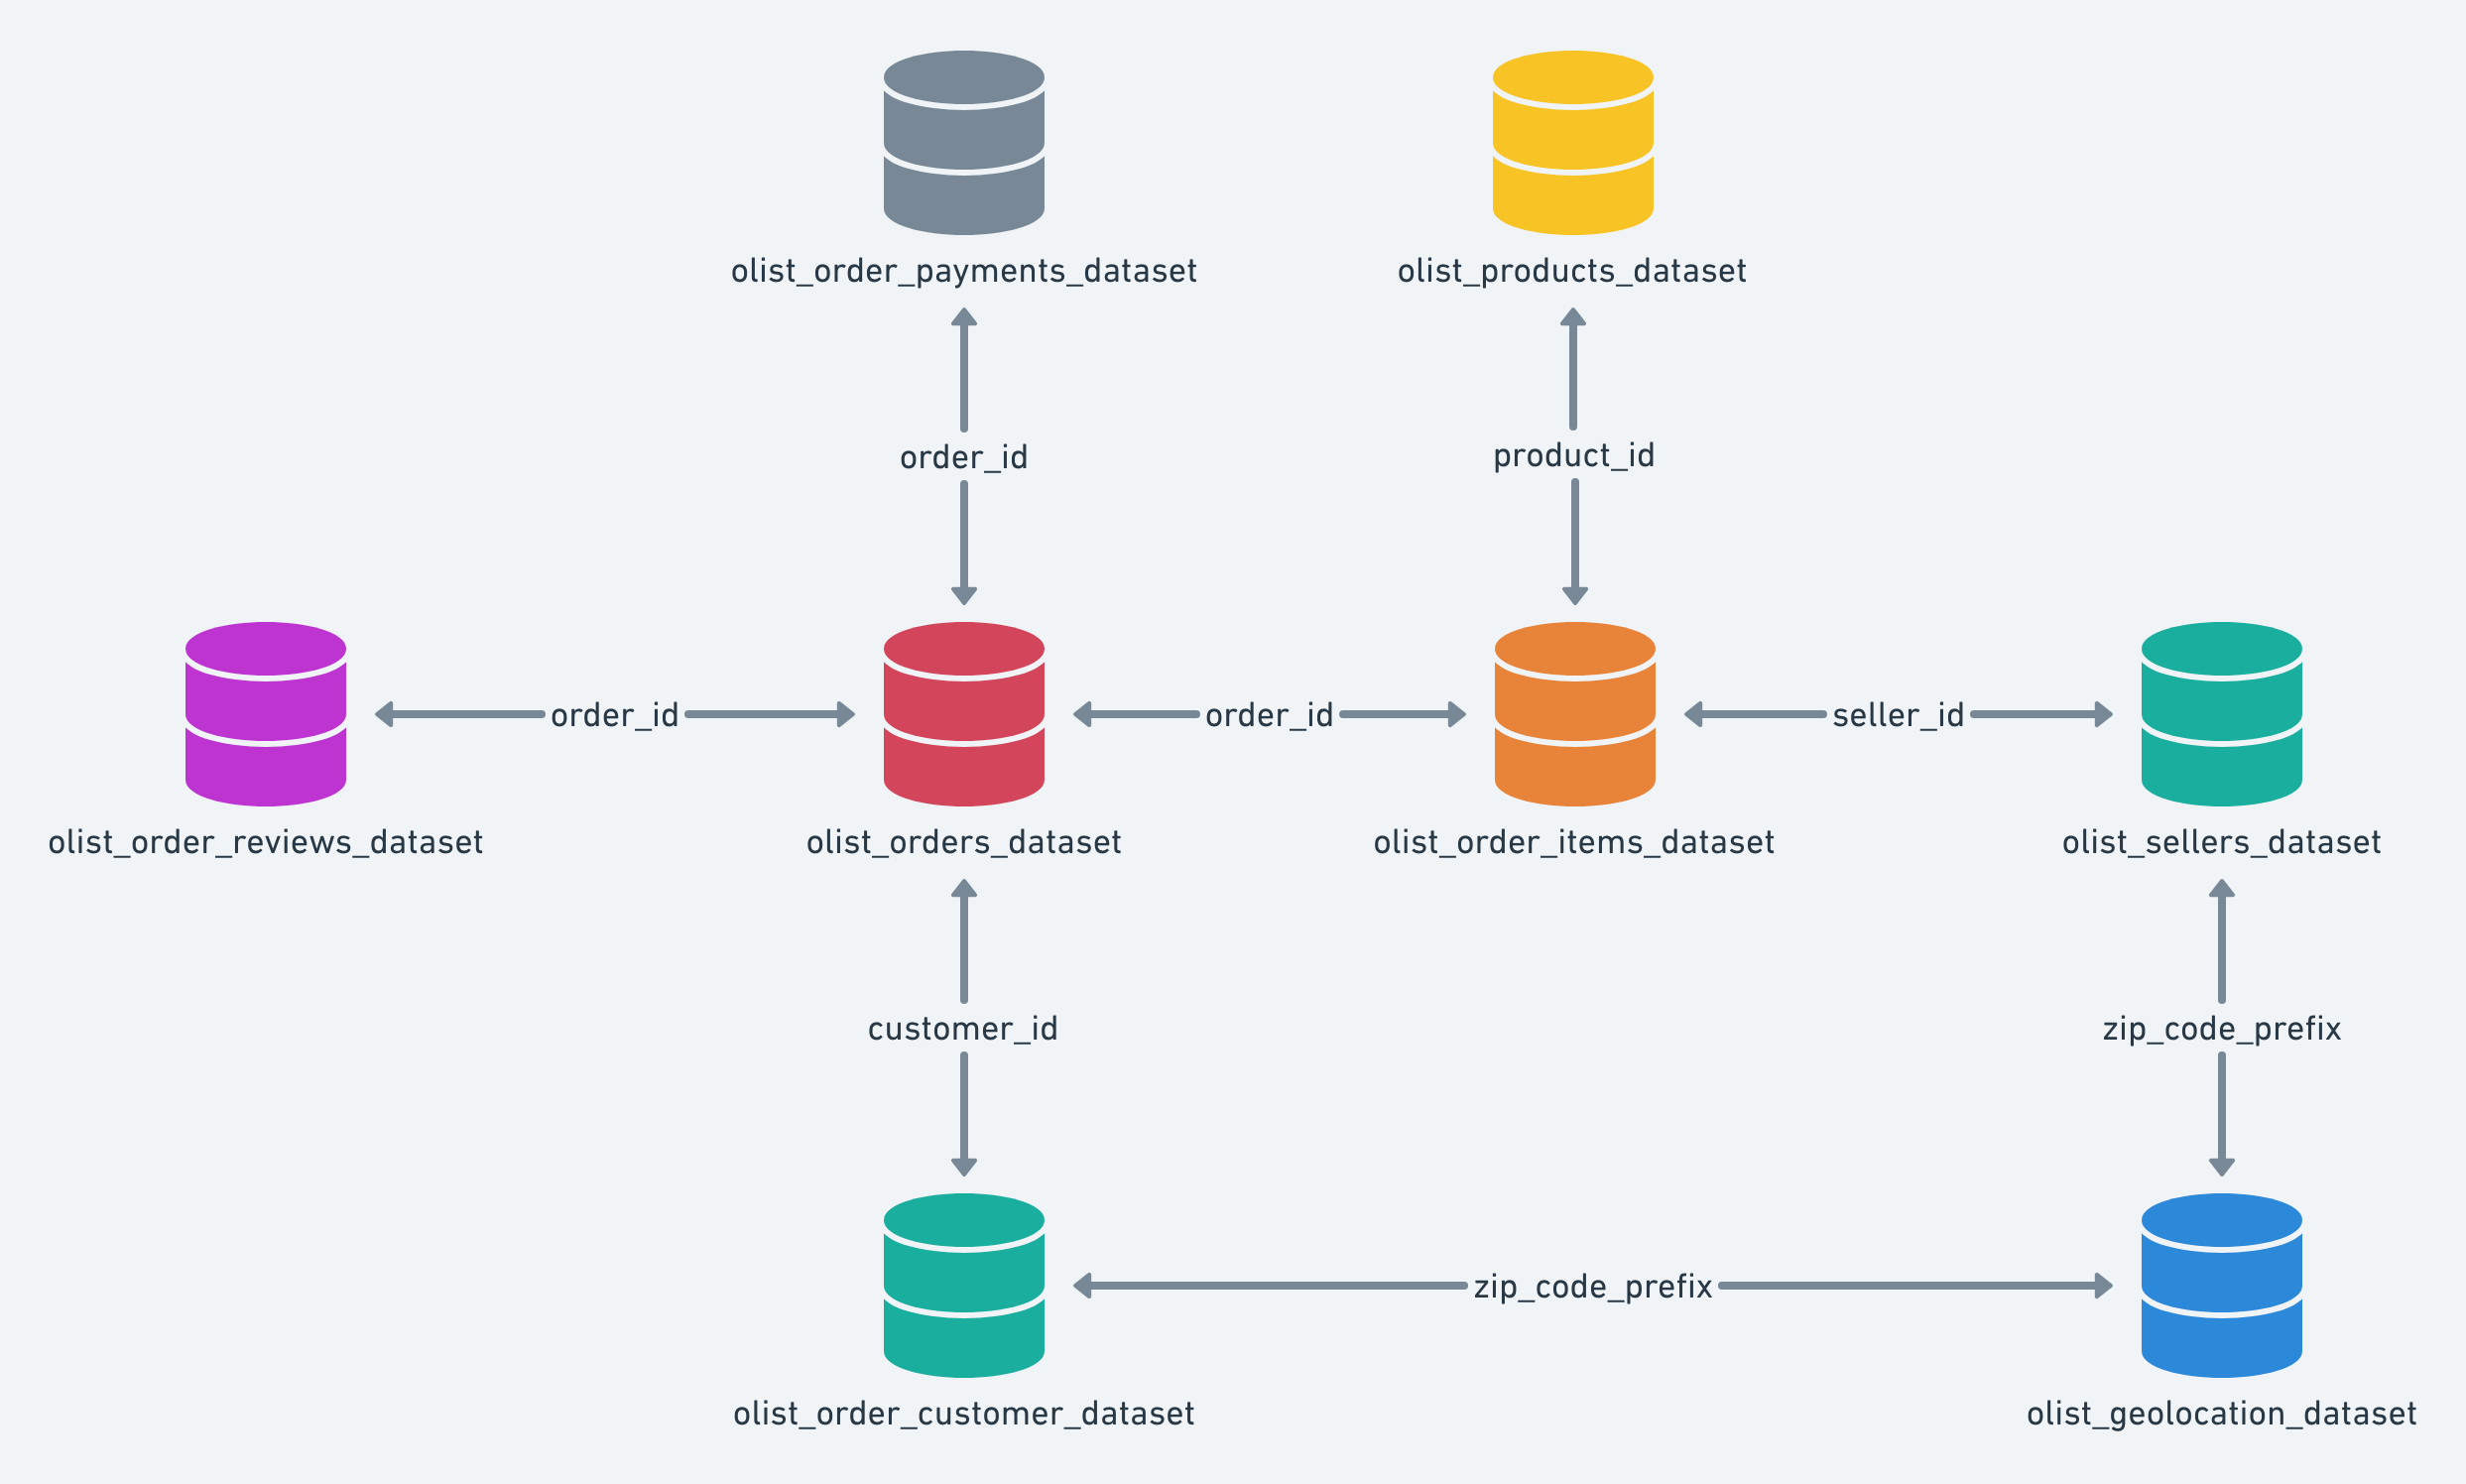

<a name="traduction"></a>
## **Dataset sur la traduction des données**

Ce dataset sert de traduction pour les catégories de produits. L'entreprise étant Brésilienne, elles sont en portuguais.

In [ ]:
trad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
trad.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


On va faire la traduction de nos produits de Brésilien à Francais

In [ ]:
translator = Translator()

trad['product_category_name_french'] = trad['product_category_name_english'].apply(
translator.translate, src = 'en', dest = 'fr').apply(getattr, args = ('text',))

<a name="Introduction"></a>
## **Dataset sur les utilisateurs**

On observe que *customer_id* est une clé permettant d'accéder au numéro de commande , et que *customer_unique_id* est un identifiant pour l'utilisateur.

L'utilisateur peut donc avoir différents *customer_id*.

In [ ]:
utilisateur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
display(utilisateur.head())

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Nous n'avons pas de valeurs manquantes dans ce Dataframe

In [ ]:
utilisateur.isnull().sum().sort_values()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

On va regarder s'il y a des duplicates sur l'identité du client et nettoyer celà si c'est le cas. Sur 99941 utilisateurs, on a que 3345 duplicates.

In [ ]:
display(utilisateur.duplicated(subset='customer_unique_id').sum())

3345

In [ ]:
display(utilisateur.duplicated(subset=['customer_unique_id',
                                       'customer_id']).sum())

0

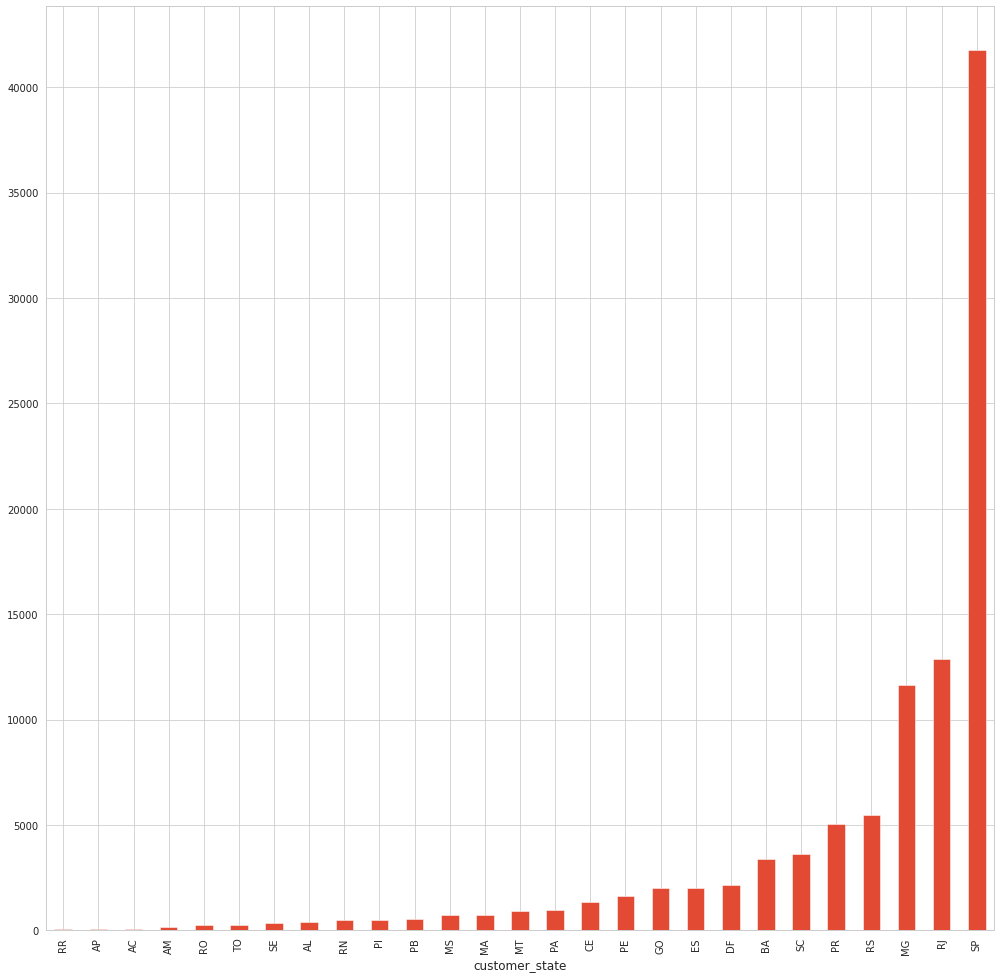

In [ ]:
utilisateur_data=utilisateur.groupby(by='customer_state').size()

%matplotlib inline
utilisateur_data.sort_values().plot.bar(figsize=(17,17))

On remarque que la majorité des acheteurs se situent dans l'état de Sao Paulo, ce qui est logique étant donné que c'est la capitale. On va regarder nos valeurs en pourcentage.

In [ ]:
utilisateur_data_bis = utilisateur.groupby(
by='customer_state').size()*100/utilisateur.shape[0]

frame = pd.DataFrame({ 'ratio':utilisateur_data_bis.values},
                     index = utilisateur_data_bis.index)

Text(0.5, 1.0, 'Répartition du pourcentage des utilisateurs par état, pourcentage > 3 % ')

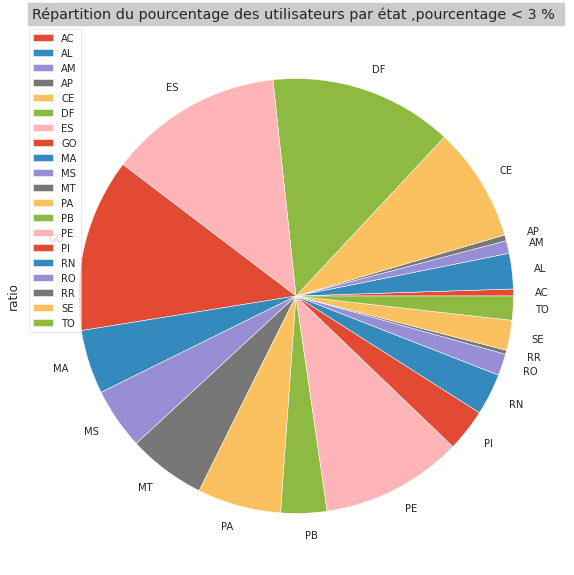

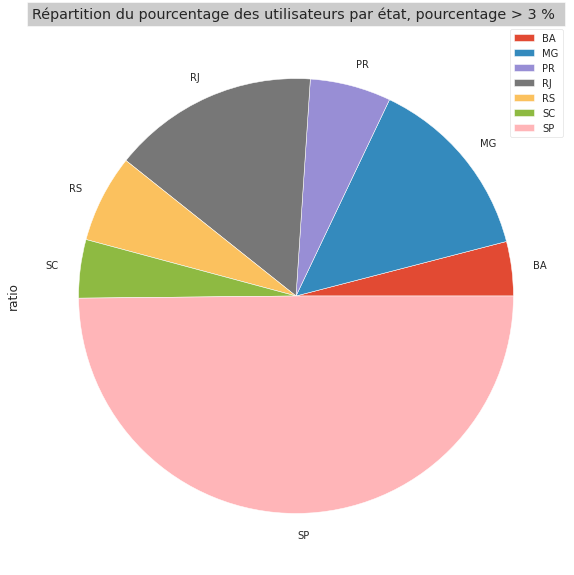

In [ ]:
threshold = 3

dft_subset1 =  frame[frame['ratio'] <= threshold]
dft_subset2 =  frame[frame['ratio'] > threshold]

plot1 = dft_subset1.plot.pie(y='ratio', figsize=(10, 10))

plt.title(
"Répartition du pourcentage des utilisateurs par état ,pourcentage < 3 % ",
 bbox={'facecolor':'0.8', 'pad':5})

plot2 = dft_subset2.plot.pie(y='ratio', figsize=(10, 10))
plt.title(
"Répartition du pourcentage des utilisateurs par état, pourcentage > 3 % ", 
                                        bbox={'facecolor':'0.8', 'pad':5})

<a name="Renommages"></a>

## **Dataset sur la géolocalisation**

Ce dataset nous affiche les différentes zipcodes et leurs coordonées en lattitude et longitude, qui sont utilisées par localiser les vendeurs et les clients.

In [ ]:
localisation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
localisation['geolocation_state'].unique()

array(['SP', 'RN', 'AC', 'RJ', 'ES', 'MG', 'BA', 'SE', 'PE', 'AL', 'PB',
       'CE', 'PI', 'MA', 'PA', 'AP', 'AM', 'RR', 'DF', 'GO', 'RO', 'TO',
       'MT', 'MS', 'RS', 'PR', 'SC'], dtype=object)

In [ ]:
localisation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [ ]:
localisation.rename(
    columns = {'geolocation_zip_code_prefix':'customer_zip_code_prefix'}, 
    inplace = True)

In [ ]:
display(localisation.duplicated(subset='customer_zip_code_prefix').sum())

981148

In [ ]:
loc_dupli = localisation[localisation.duplicated(
    subset = ['customer_zip_code_prefix'], keep=False)]

In [ ]:
loc_dupli['geolocation_lng']< -50

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
loc_dupli.describe()

,customer_zip_code_prefix,geolocation_lat,geolocation_lng
count,999120.000000,999120.000000,999120.000000
mean,36561.160636,-21.180584,-46.391924
std,30550.830935,5.711304,4.264210
min,1001.000000,-36.605374,-101.466766
25%,11070.000000,-23.603681,-48.573042
50%,26521.000000,-22.919709,-46.637929
75%,63480.000000,-19.981809,-43.770683
max,99990.000000,45.065933,13.820214


La lattitude et longitude du Brésil sont calculées avec la moyennes de celles de tout les états dans notre jeu de données. 

Les utilisateurs sont bien situés au Brésil en observant la carte ci-dessus.

In [ ]:
bresil_lat = loc_dupli['geolocation_lat'].mean()
bresil_lon = loc_dupli['geolocation_lng'].mean()
bresil_map = folium.Map(location=[bresil_lat, bresil_lon], zoom_start=3)

#Clusters
marker_cluster = folium.plugins.MarkerCluster().add_to(bresil_map)
for lat, lng, in zip(
    loc_dupli.sample(10000).geolocation_lat, loc_dupli.geolocation_lng):
    folium.Marker(location=[lat, lng]).add_to(marker_cluster)

bresil_map

Output hidden; open in https://colab.research.google.com to view.

<a name="produits"></a>
## **Dataset sur les produits**

In [ ]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
display(product.head())

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


On observe ici que ce dataset nous affiche tout les produits vendus avec leur caractéristiques. On observe que les colonnes, excepté l'identifiant du produit, ont des valeurs manquantes. On va remplir ces colonnes avec la médiane.

In [ ]:
product.isnull().sum().sort_values()

product_id                      0
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
dtype: int64

Les valeurs manquantes étant minimes(inférieur à 2%) , on va garder ces features.

In [ ]:
product.isnull().sum()*100/product.shape[0]

product_id                    0.000000
product_category_name         1.851234
product_name_lenght           1.851234
product_description_lenght    1.851234
product_photos_qty            1.851234
product_weight_g              0.006070
product_length_cm             0.006070
product_height_cm             0.006070
product_width_cm              0.006070
dtype: float64

In [ ]:
for col in product:
 
    
    dt = product[col].dtype 
 
    if dt == int or dt == float:
        mean_value = product[col].mean() 
        product[col].fillna(value = mean_value, inplace = True)



    

In [ ]:
product = pd.merge(product, trad, how='inner',left_on = ['product_category_name'],
                   right_on = ['product_category_name'], suffixes=('', '_drop'))

product = product.drop(columns = ['product_category_name',
                              'product_category_name_english'])

On observe ci-dessous les produits les plus commandés par les utilisateurs.

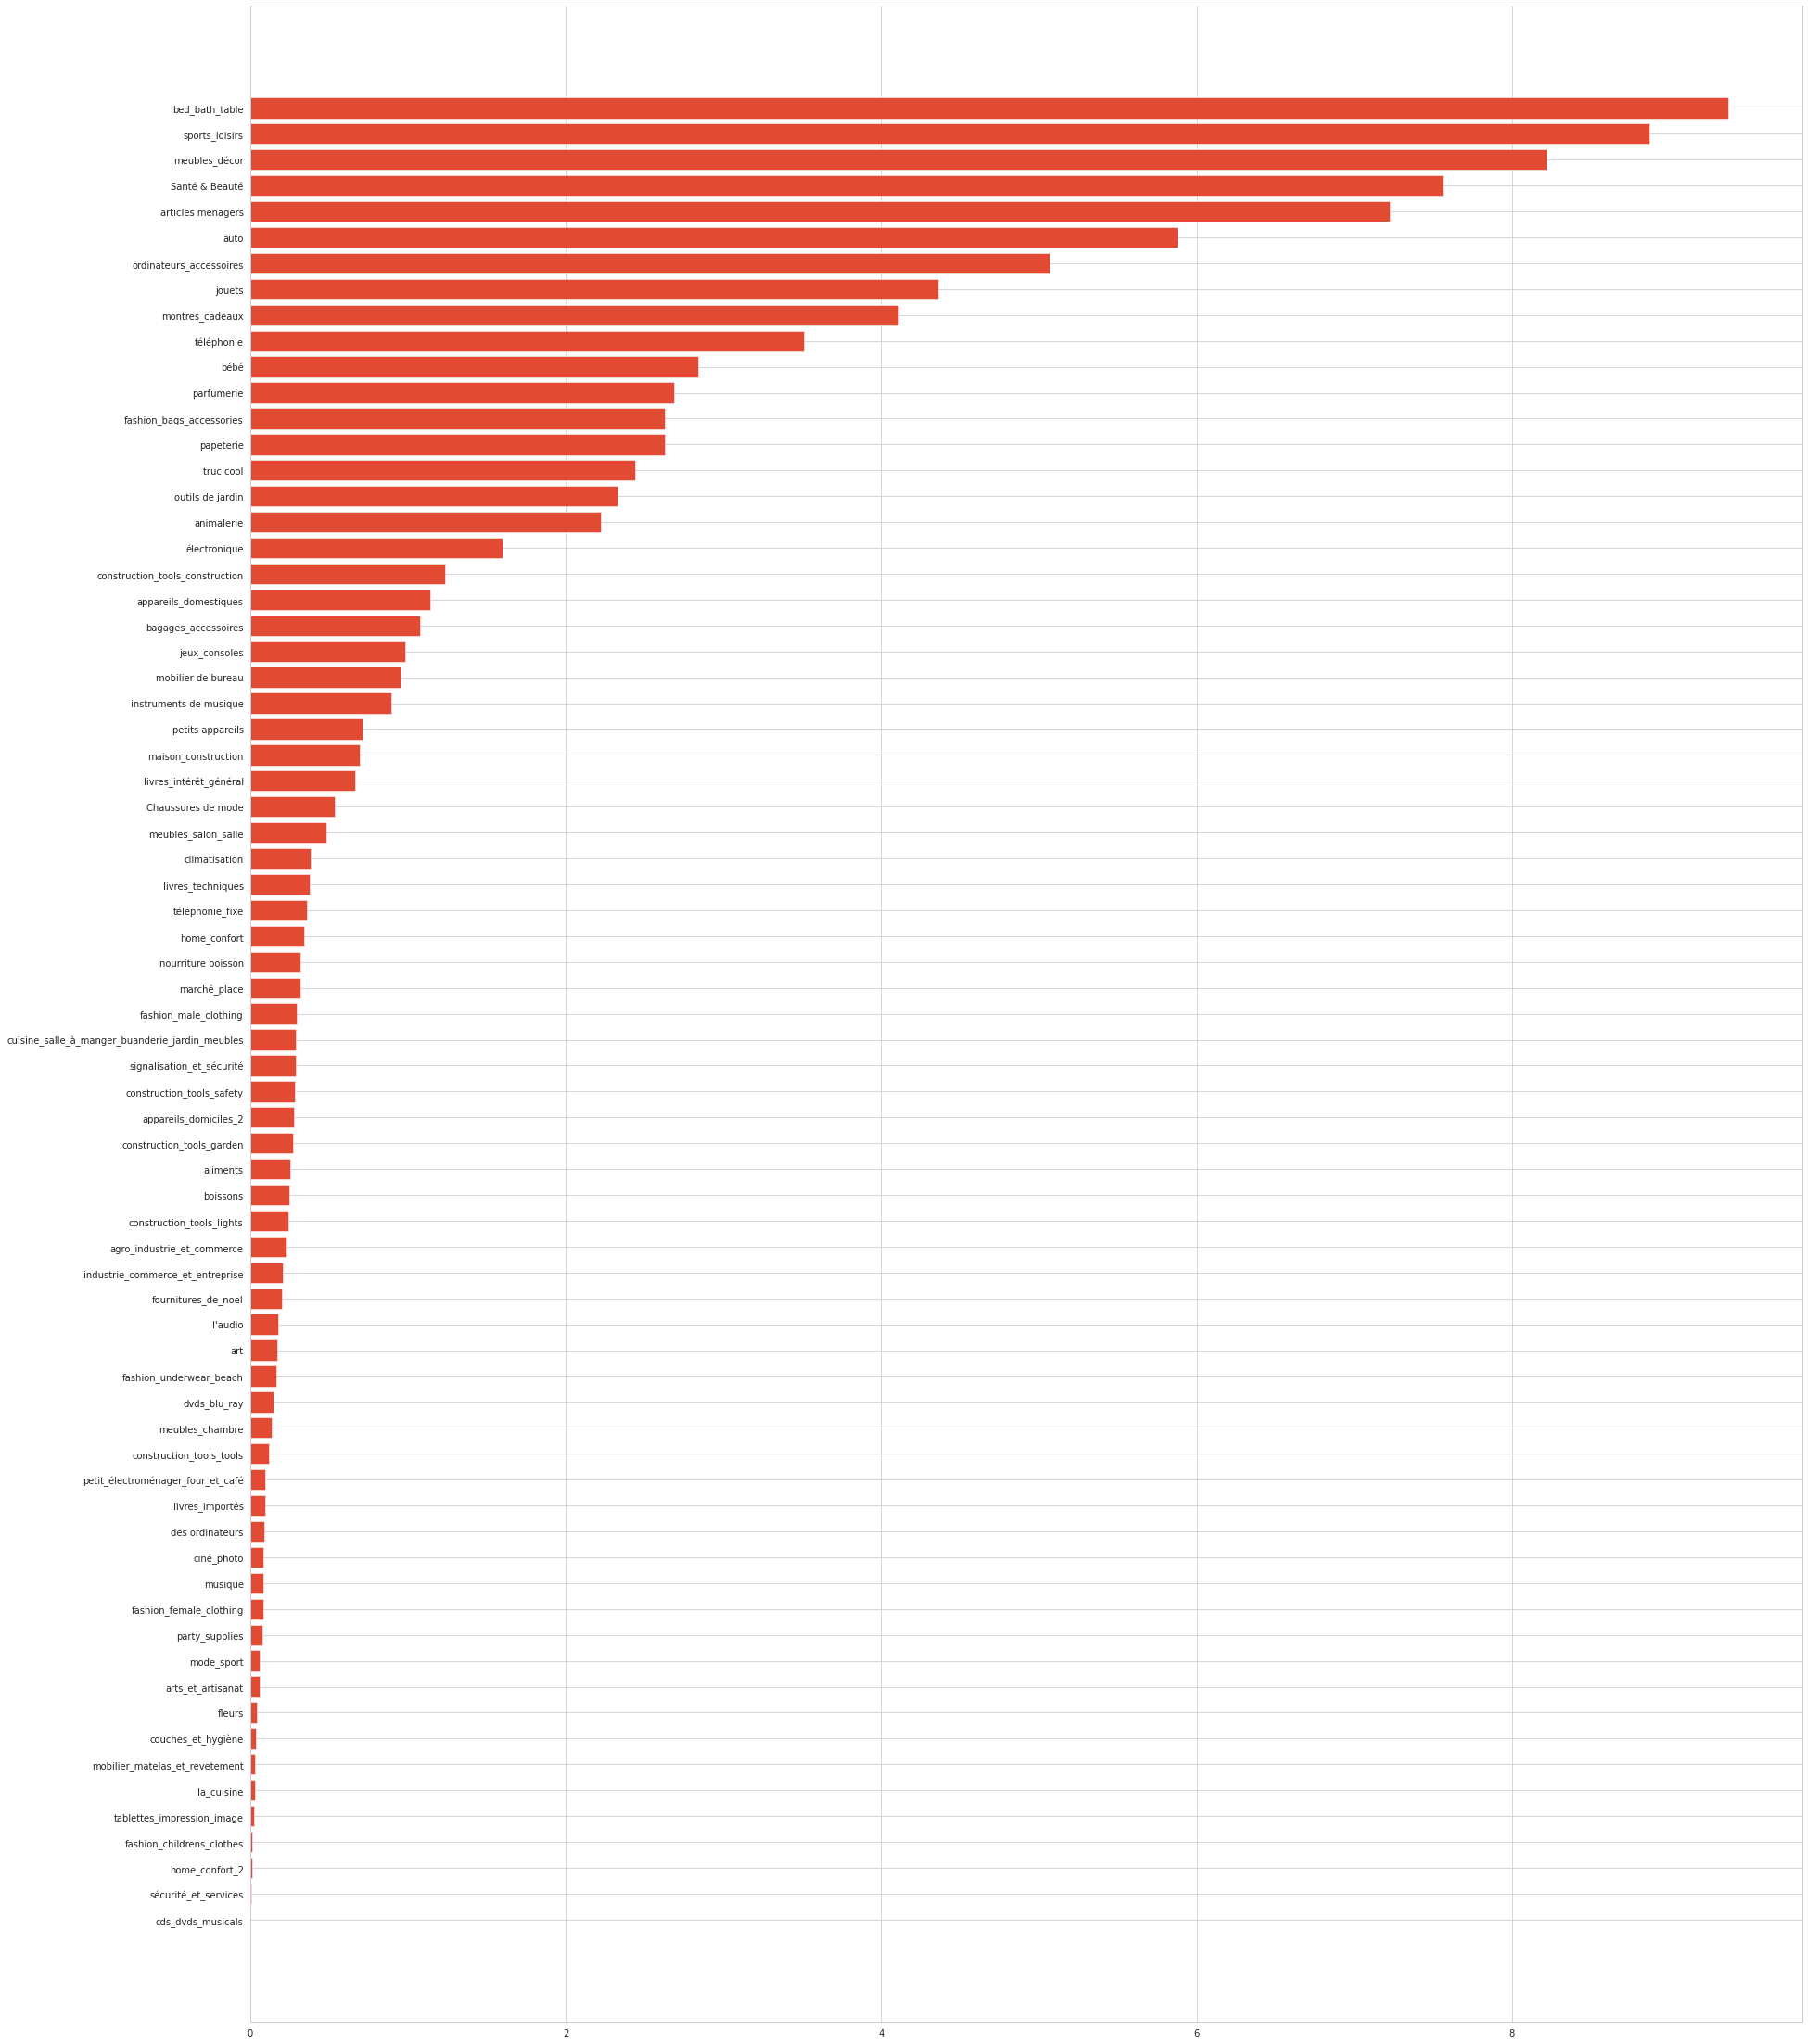

In [ ]:
product_cat=product.groupby(by='product_category_name_french').size()*100/product.shape[0]

product_cat = product_cat.sort_values()

frame_bis = pd.DataFrame(product_cat, columns = ['ratio'])

plt.rcParams["figure.figsize"] = (30, 40)

ax = plt.barh(y=product_cat.index,width = frame_bis['ratio'].values)

<a name="corr"></a>

## **Dataset sur les commandes**



In [ ]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
(orders.head()).sort_values(by = ['order_approved_at'])

orders.head().sort_index(axis = 0, ascending = False)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00


In [ ]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
orders.isnull().sum()*100/orders.shape[0]

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
order_estimated_delivery_date    0.000000
dtype: float64

Des dates sont manquantes, on va donc traiter ces valeurs. De plus, on ne garde que les commandes qui ont bien été livrées.

In [ ]:
orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [ ]:
X = orders[['order_approved_at', 'order_delivered_carrier_date',
           'order_delivered_customer_date']]

for col in X:
  
  nan_column =  orders[orders[col].isna()]
  nan_column = nan_column[~nan_column['order_status'].str.contains("delivered",
                                                                  "approved")]
  orders.drop(nan_column.index, axis = 0,inplace=True)
  orders[col].fillna(value = 0, inplace=True)
  
del nan_column

On a plus de données manquantes.

In [ ]:
orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

<a name="createurs"></a>
## **Dataset sur les objets commandés**


Ce dataset nous montre des informations sur la livraison et le prix des produits achetés. 

Freight_value correspond aux frais de port.

In [ ]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

On observe que des produits ont eu plusieurs commandes différentes.

In [ ]:
display(items.duplicated(subset = 'product_id').sum())

79699

In [ ]:
items_copy = items[items.duplicated(subset = ['product_id'], keep = False)]

items_copy = items_copy.sort_values(by = ['product_id'])

display(items_copy.head())

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
48878,6f0dfb5b5398b271cc6bbd9ee263530e,1,000b8f95fcb9e0096488278317764d19,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-07 22:15:19,58.9,19.60
25833,3aba44d8e554ab4bb8c09f6f78032ca8,1,000b8f95fcb9e0096488278317764d19,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-16 13:35:21,58.9,19.60
93674,d44be4540d1a35533a9f5c89377b77f1,1,00126f27c813603687e6ce486d909d01,cd68562d3f44870c08922d380acae552,2017-09-21 20:50:13,249.0,16.49
88768,c9a34c30282dc36d017bc912f8d8dc91,1,00126f27c813603687e6ce486d909d01,cd68562d3f44870c08922d380acae552,2017-09-21 20:55:19,249.0,13.24
87904,c78ef951d29d8e1af5f1f807a64af309,1,001795ec6f1b187d37335e1c4704762e,8b321bb669392f5163d04c59e235e066,2018-01-03 00:34:19,38.9,9.34


<a name="createur"></a>
## **Dataset sur les paiements:**


Payment_sequential correspond aux nombre de méthodes de paiement utilisés par les clients.

Payment_installments correspond au nombre de paiements ayant été faits pour acheter le produit.



In [ ]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


<a name="createur1"></a>
## **Dataset sur les avis des clients**

In [ ]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


On supprime les lignes qui n'ont pas de score car c'est ce dernier qui nous importe.

In [ ]:
X = review[['review_score']]

for col in X:
  
  nan_column =  review[review[col].isna()]
  review.drop(nan_column.index, axis=0,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


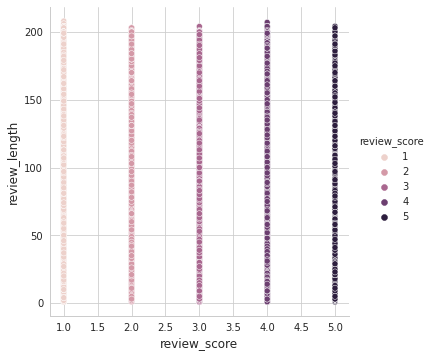

In [ ]:
review_bis = review

review_bis = review_bis[review_bis['review_comment_message'].notna()]

review_na = review_bis['review_comment_message']

length = review_na.str.len()

review_bis["review_length"] = length




sns.pairplot(review_bis, size = 5, hue = 'review_score',
                               x_vars = ['review_score'],
                              y_vars = ['review_length'])

plt.show()

Il n'y a pas de vraie relation entre le score des commentaires et leur longueur.
On voit que la majorité des scores des reviews sont égaux à 4 ou 5.

In [ ]:
new = pd.merge(payments,items, on ='order_id')

In [ ]:
new_bis = pd.merge(review,new, on ='order_id')

new_bis.head().sort_values(by = ['review_score'])

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,1,credit_card,8,397.26,1,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,1,credit_card,8,397.26,2,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,1,credit_card,1,88.09,1,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-06 12:48:39,79.79,8.30
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,1,credit_card,1,194.12,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-02-08 10:31:15,149.00,45.12
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,1,credit_card,1,222.84,1,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,2017-04-13 17:55:19,179.99,42.85


In [ ]:
new_bis.head()['review_score'].sort_index(axis = 0, ascending = False)

4    5
3    5
2    5
1    4
0    4
Name: review_score, dtype: int64

<a name="createur2"></a>
## **Dataset sur les vendeurs:**

In [ ]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
sellers.sort_values(by = ['seller_state'])

,seller_id,seller_zip_code_prefix,seller_city,seller_state
385,4be2e7f96b4fd749d52dff41f80e39dd,69900,rio branco,AC
2366,327b89b872c14d1c0be7235ef4871685,69005,manaus,AM
2685,75d34ebb1bd0bd7dde40dd507b8169c3,41820,salvador,BA
1180,2b402d5dc42554061f8ea98d1916f148,44900,irece,BA
2193,f3055483058c84d75ca2a3314fb4deef,40368,salvador,BA
358,43753b27d77860f1654aa72e251a7878,44895,barro alto,BA
1970,651530bf5c607240ccdd89a30c9c9712,44600,ipira,BA
1035,eb4a59a06b3948e851a7d7a830bcbc42,41820,salvador,BA
18,d2e753bb80b7d4faa77483ed00edc8ca,45810,porto seguro,BA
2601,4fb41dff7c50136976d1a5cf004a42e2,44002,feira de santana,BA


On peut observer de ce dataset que la majorité des vendeurs viennent de Sao Paulo tout comme les utilisateurs.

In [ ]:
SP = sellers[sellers['seller_state'].str.contains('SP', na = False)]

print("Le pourcentage de vendeurs étant à Sao Paulo est de",
      100*SP.shape[0]/sellers.shape[0] , "pourcents")

Le pourcentage de vendeurs étant à Sao Paulo est de 59.74151857835218 pourcents


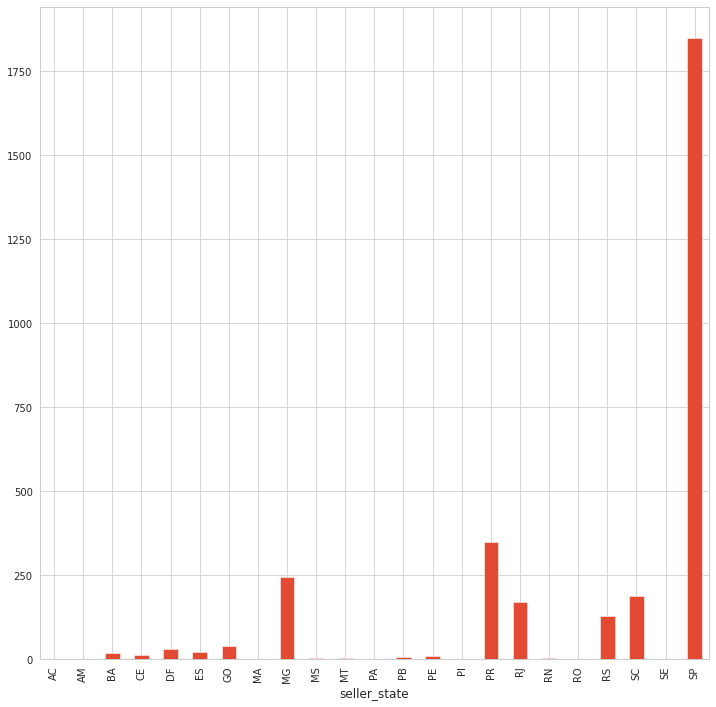

In [ ]:
sell_data = sellers.groupby(by = 'seller_state').size()

sell_data.plot.bar(figsize = (12,12))

<a name="createur3"></a>
## **Mise en commun des Datasets:**

On met en commun les Datasets sur les commandes pour avoir toutes leurs données.

In [ ]:
# Olist location
olist_lat = -25.43045
olist_lon = -49.29207

In [ ]:
def haversine_distance(lat1, lng1, lat2, lng2, degrees=True):
    r = 3956 # rayon de la Terre en miles
    
    if degrees:
        lat1, lng1, lat2, lng2 = map(radians, [lat1, lng1, lat2, lng2])
    
    # Formule Haversine
    dlng = lng2 - lng1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlng/2)**2
    d = 2 * r * asin(sqrt(a))  

    return d

In [ ]:
# Haversine distance between centre state and Olist office

from math import radians, cos, sin, asin, sqrt

localisation['harvesine_distance'] = [haversine_distance(olist_lat, olist_lon,
                                                         x, y) 
                              for x, y in zip(localisation.geolocation_lat, 
                                              localisation.geolocation_lng)]

In [ ]:
localisation.head()

,customer_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,harvesine_distance
0,1037,-23.545621,-46.639292,sao paulo,SP,211.459852
1,1046,-23.546081,-46.644820,sao paulo,SP,211.166404
2,1046,-23.546129,-46.642951,sao paulo,SP,211.256836
3,1041,-23.544392,-46.639499,sao paulo,SP,211.502459
4,1035,-23.541578,-46.641607,sao paulo,SP,211.519308


In [ ]:
utilisateur_bis =  utilisateur.merge(localisation, 
                                     left_on ='customer_zip_code_prefix', 
                                     right_on ='customer_zip_code_prefix')

utilisateur_bis = utilisateur_bis.drop_duplicates(['customer_id',
                                                 'customer_unique_id'],
                                                keep = 'last')

utilisateur_bis = utilisateur_bis.drop(columns = ['customer_zip_code_prefix',
                                                         'customer_city',
                                'geolocation_city','geolocation_state',
                                'geolocation_lat','geolocation_lng'])

In [ ]:
utilisateur_bis.head()

,customer_id,customer_unique_id,customer_state,harvesine_distance
146,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,361.006047
293,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,SP,361.006047
440,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,SP,361.006047
587,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,SP,361.006047
734,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,SP,361.006047


In [ ]:
data =  pd.merge(utilisateur_bis,orders, on ='customer_id')

data =  pd.merge(data,review, on ='order_id')

data =  pd.merge(data,payments, on ='order_id')

data =  pd.merge(data,items, on ='order_id')

data =  pd.merge(data,product, on ='product_id')

In [ ]:
data = data.drop_duplicates(['customer_id','customer_unique_id'],keep = 'last')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94236 entries, 0 to 112919
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    94236 non-null  object 
 1   customer_unique_id             94236 non-null  object 
 2   customer_state                 94236 non-null  object 
 3   harvesine_distance             94236 non-null  float64
 4   order_id                       94236 non-null  object 
 5   order_status                   94236 non-null  object 
 6   order_purchase_timestamp       94236 non-null  object 
 7   order_approved_at              94236 non-null  object 
 8   order_delivered_carrier_date   94236 non-null  object 
 9   order_delivered_customer_date  94236 non-null  object 
 10  order_estimated_delivery_date  94236 non-null  object 
 11  review_id                      94236 non-null  object 
 12  review_score                   94236 non-null

In [ ]:
for i in data:
    data['volume'] = data['product_length_cm'] * data[
      'product_height_cm'] * data['product_width_cm']

In [ ]:
data['order_delivered_customer_date'] = pd.to_datetime(
    data['order_delivered_customer_date'])

data['order_approved_at'] = pd.to_datetime(data['order_approved_at'])

In [ ]:
data['delay'] = data['order_delivered_customer_date'] - data['order_approved_at']

data = data.drop(columns = ['customer_id','order_status','order_purchase_timestamp',
                  'order_approved_at','order_delivered_carrier_date',
                  'order_estimated_delivery_date','review_id',
                  'review_comment_title','review_comment_message',
                  'review_answer_timestamp','order_item_id',
                  'shipping_limit_date','freight_value','product_name_lenght',
                  'product_description_lenght','product_length_cm',
                  'product_height_cm','product_width_cm'
                  ])

In [ ]:
data = data.drop(columns = ['review_creation_date'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94236 entries, 0 to 112919
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   customer_unique_id             94236 non-null  object         
 1   customer_state                 94236 non-null  object         
 2   harvesine_distance             94236 non-null  float64        
 3   order_id                       94236 non-null  object         
 4   order_delivered_customer_date  94236 non-null  datetime64[ns] 
 5   review_score                   94236 non-null  int64          
 6   payment_sequential             94236 non-null  int64          
 7   payment_type                   94236 non-null  object         
 8   payment_installments           94236 non-null  int64          
 9   payment_value                  94236 non-null  float64        
 10  product_id                     94236 non-null  object         
 11  s

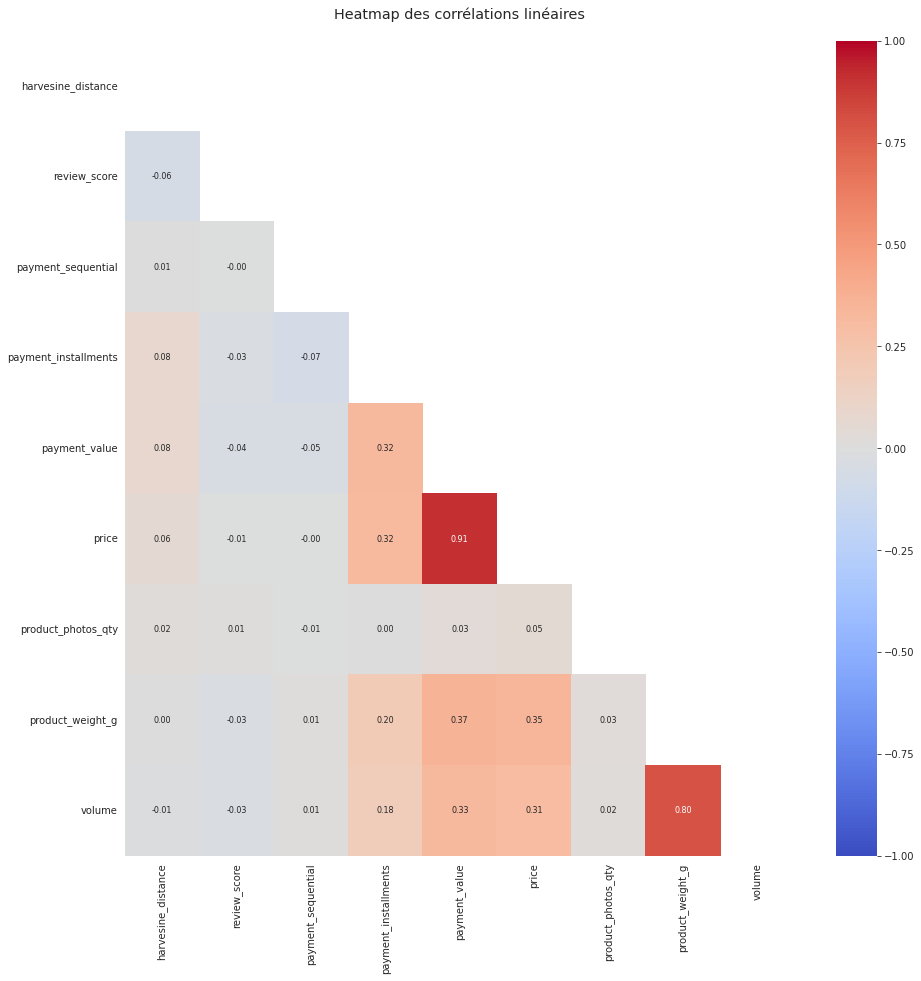

In [ ]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True,
                 vmin=-1, vmax=1,
                 fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, 
                 center=0, 
                 cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n", 
        )
plt.show()

On observe des variables en fonction du volume et on n'observe pas de réelles corrélations ici.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


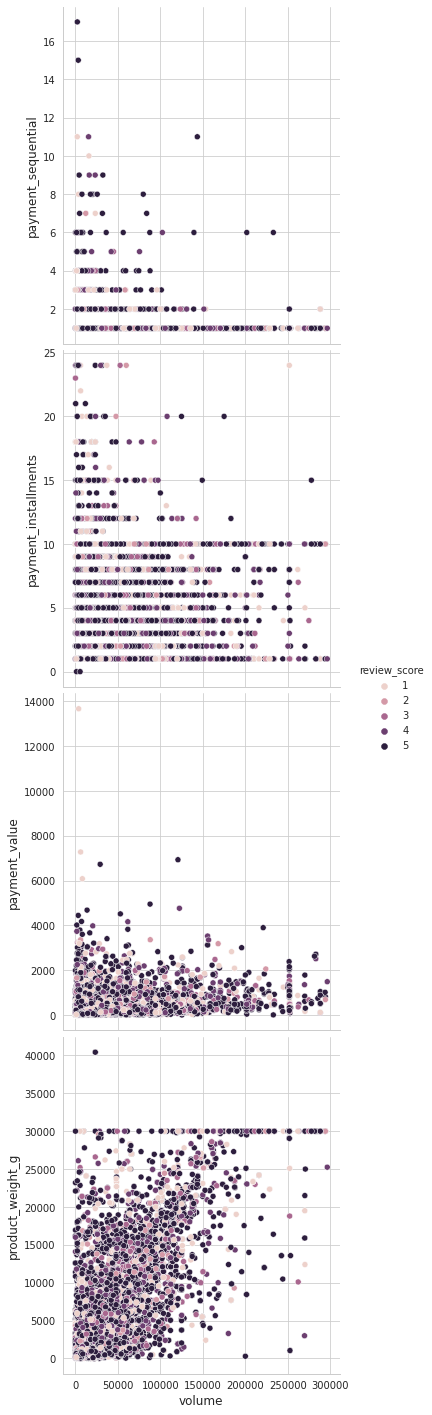

In [ ]:
sns.pairplot(data, size = 5, hue = 'review_score',
            x_vars = ['volume'],
            y_vars = ['payment_sequential', 'payment_installments', 
                     'payment_value', 'product_weight_g'])

plt.show()

In [ ]:
data.to_csv("/content/drive/MyDrive/Segmentation_Clean.csv")